In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_excel('7B21E008.xls',sheet_name=1)
df.head()

,year,month,day,hour,member,weekend,season,temperature,dewpoint,humidity,windspeed,windgust,pressure,precip,precipaccum,weather,rental
0,2016,10,1,0,80,1,fall,18.33,65.0,100.0,6.0,0.0,30.1,0.0,0.0,3,103
1,2016,10,1,1,53,1,fall,17.78,64.0,100.0,10.0,0.0,30.1,0.0,0.0,3,63
2,2016,10,1,2,27,1,fall,17.78,64.0,100.0,10.0,0.0,30.1,0.0,0.0,3,33
3,2016,10,1,3,20,1,fall,17.78,64.0,100.0,10.0,0.0,30.1,0.1,0.0,3,23
4,2016,10,1,4,11,1,fall,17.78,64.0,100.0,9.0,0.0,30.1,0.0,0.0,3,11


In [2]:
df.isnull().sum() #no missing values in any of column

year           0
month          0
day            0
hour           0
member         0
weekend        0
season         0
temperature    0
dewpoint       0
humidity       0
windspeed      0
windgust       0
pressure       0
precip         0
precipaccum    0
weather        0
rental         0
dtype: int64

<AxesSubplot:>

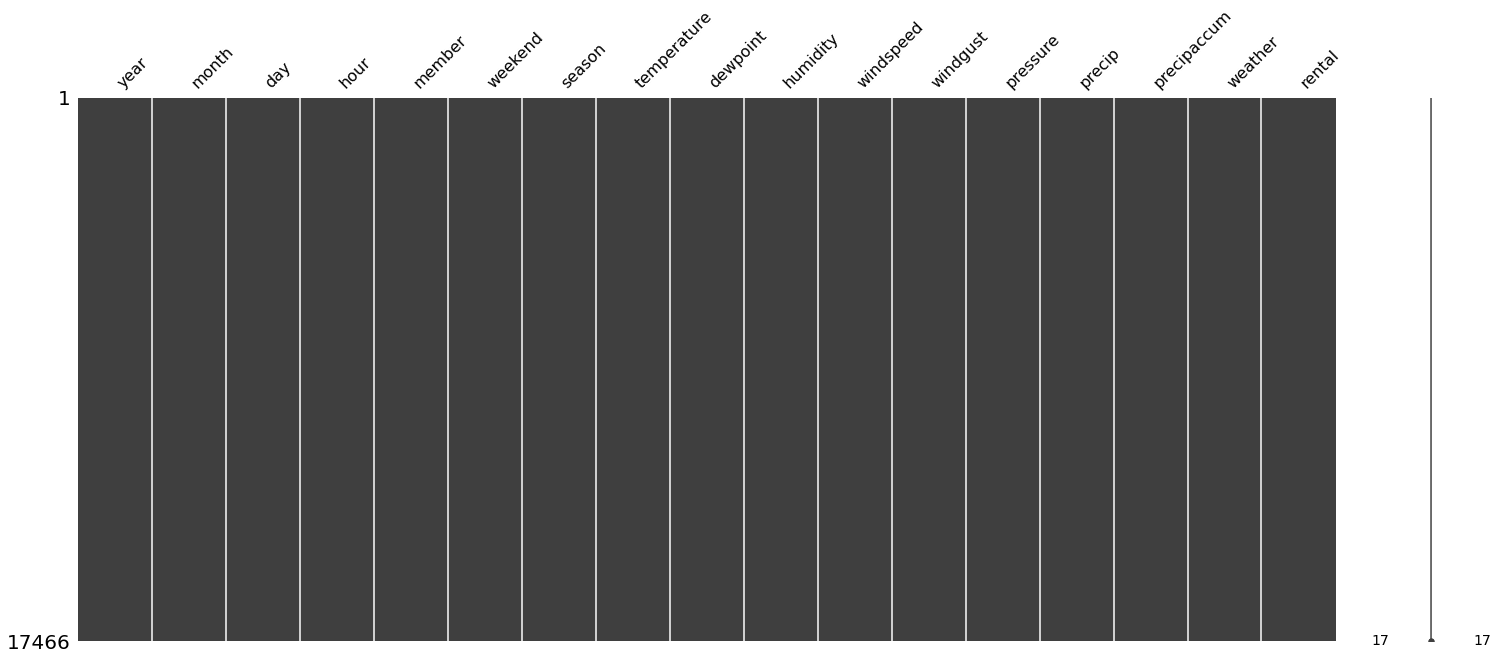

In [59]:
import missingno as msno
msno.matrix(df) #visual represantation of no missing values

In [60]:
df['year']=df.year.astype('category')
df['month']=df.month.astype('category')
df['day']=df.day.astype('category')
df['hour']=df.hour.astype('category')
df['weekend']=df.weekend.astype('category')
df['weather']=df.weather.astype('category')
df['season']=df.season.astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17466 entries, 0 to 17465
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   year         17466 non-null  category
 1   month        17466 non-null  category
 2   day          17466 non-null  category
 3   hour         17466 non-null  category
 4   member       17466 non-null  int64   
 5   weekend      17466 non-null  category
 6   season       17466 non-null  category
 7   temperature  17466 non-null  float64 
 8   dewpoint     17466 non-null  float64 
 9   humidity     17466 non-null  float64 
 10  windspeed    17466 non-null  float64 
 11  windgust     17466 non-null  float64 
 12  pressure     17466 non-null  float64 
 13  precip       17466 non-null  float64 
 14  precipaccum  17466 non-null  float64 
 15  weather      17466 non-null  category
 16  rental       17466 non-null  int64   
dtypes: category(7), float64(8), int64(2)
memory usage: 1.5 MB


In [61]:
df.describe()

,member,temperature,dewpoint,humidity,windspeed,windgust,pressure,precip,precipaccum,rental
count,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000
mean,317.602657,15.557475,47.166089,65.172028,8.811951,3.095630,30.047717,0.003403,0.003845,420.144910
std,315.397551,9.794618,19.570545,19.549624,5.104676,8.664425,0.390741,0.029175,0.065460,402.473513
min,0.000000,-12.780000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,63.000000,7.780000,32.000000,49.000000,6.000000,0.000000,29.900000,0.000000,0.000000,77.000000
50%,244.000000,16.670000,50.000000,66.000000,8.000000,0.000000,30.000000,0.000000,0.000000,315.500000
75%,455.750000,23.890000,64.310000,82.000000,12.000000,0.000000,30.200000,0.000000,0.000000,634.000000
max,1639.000000,36.110000,80.000000,100.000000,44.000000,59.000000,30.800000,1.320000,4.000000,2038.000000


<AxesSubplot:>

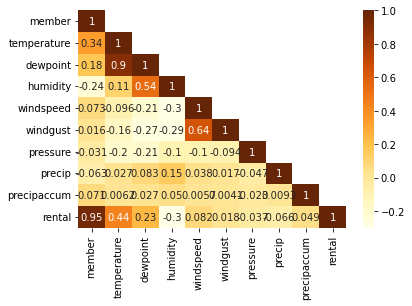

In [62]:
co_df=df.corr()
mask=np.array(co_df)
mask[np.tril_indices_from(mask)]=False
sns.heatmap(data=co_df,cmap='YlOrBr',annot=True,mask=mask)

In [63]:
x=df[df['year']==2016]['rental'].sum()
y=df[df['year']==2017]['rental'].sum()
z=df[df['year']==2018]['rental'].sum()
print(x)
print(y)
print(z)

771006
3755077
2812168


Text(0, 0.5, 'Total Rental by Year')

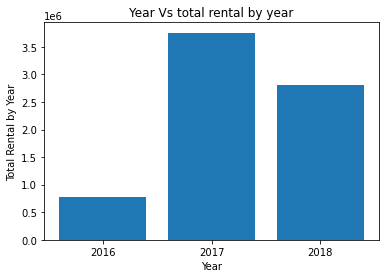

In [64]:
year=['2016','2017','2018']
total_rental_by_year=[771006,3755077,2812168]
plt.bar(year,total_rental_by_year)
plt.title('Year Vs total rental by year')
plt.xlabel('Year')
plt.ylabel('Total Rental by Year') 

# Exploratory Data Analysis

<AxesSubplot:xlabel='month', ylabel='rental'>

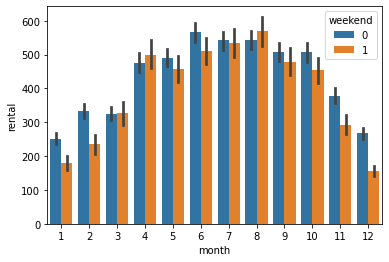

In [65]:
sns.barplot(data=df,x='month',y='rental',hue='weekend') #comparing rental, month and weekend

<AxesSubplot:xlabel='hour', ylabel='rental'>

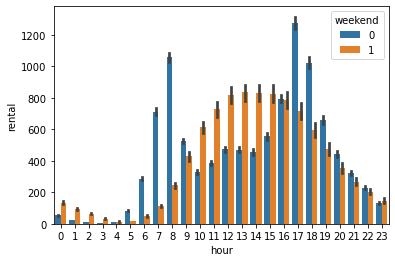

In [66]:
sns.barplot(data=df,x='hour',y='rental',hue='weekend') #comparing rental, hour and weekend

In [67]:
import plotly.express as px
px.histogram(data_frame=df,y='rental',x='season') #comparing rental,season

<AxesSubplot:xlabel='weather', ylabel='rental'>

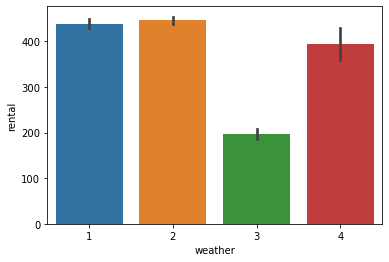

In [68]:
sns.barplot(x='weather',y='rental',data=df)#comparing rental, weather

<AxesSubplot:xlabel='hour', ylabel='rental'>

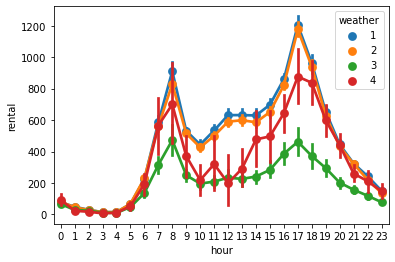

In [69]:
sns.pointplot(x='hour',y='rental',hue='weather',data =df) #comapring hour,rental and weather

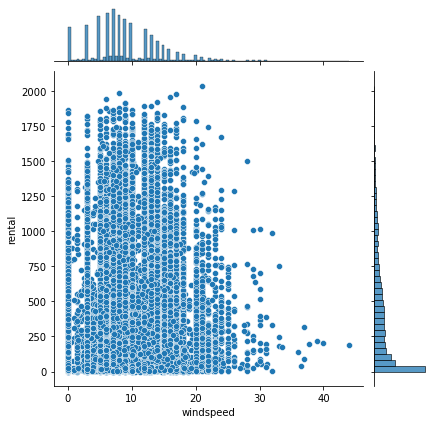

In [70]:
sns.jointplot(data=df,x='windspeed',y='rental') #comparing windspeed and rental

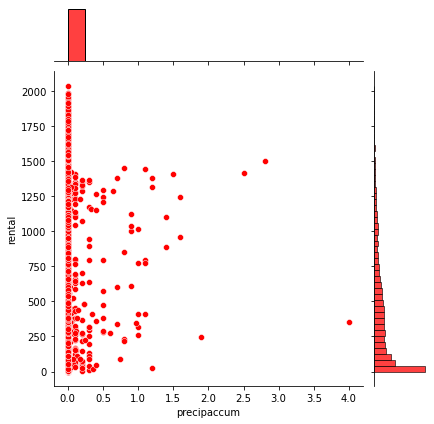

In [72]:
sns.jointplot(data=df,x='precipaccum',y='rental',color='red') #comparing percipaccum and rental

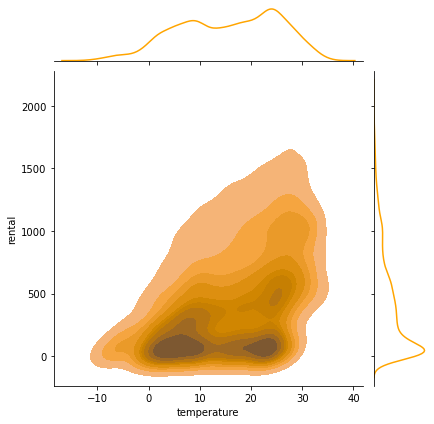

In [73]:
sns.jointplot(data=df,x='temperature',y='rental',color='orange',kind='kde',shade=True) #comparing temperature and rental

<AxesSubplot:xlabel='dewpoint', ylabel='rental'>

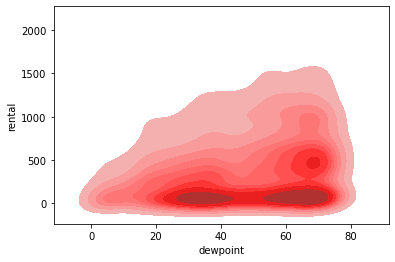

In [74]:
sns.kdeplot(x='dewpoint',y='rental',data=df,shade=True,color='red') #comparing dewpoint and rental

# Machine Learning With Standardization

In [75]:
df.drop(['precip','precipaccum','month','year','day','pressure'],axis=1,inplace=True)

In [76]:
df.head()

,hour,member,weekend,season,temperature,dewpoint,humidity,windspeed,windgust,weather,rental
0,0,80,1,fall,18.33,65.0,100.0,6.0,0.0,3,103
1,1,53,1,fall,17.78,64.0,100.0,10.0,0.0,3,63
2,2,27,1,fall,17.78,64.0,100.0,10.0,0.0,3,33
3,3,20,1,fall,17.78,64.0,100.0,10.0,0.0,3,23
4,4,11,1,fall,17.78,64.0,100.0,9.0,0.0,3,11


In [77]:
dummy = pd.get_dummies(df[['season','hour','weather',]])
dummy.head()

,season_fall,season_spring,season_summer,season_winter,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,weather_1,weather_2,weather_3,weather_4
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [78]:
dummy.drop(['season_winter','hour_23','weather_4'],axis=1,inplace=True)

In [79]:
df.drop(['season','hour','weather'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17466 entries, 0 to 17465
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   member       17466 non-null  int64   
 1   weekend      17466 non-null  category
 2   temperature  17466 non-null  float64 
 3   dewpoint     17466 non-null  float64 
 4   humidity     17466 non-null  float64 
 5   windspeed    17466 non-null  float64 
 6   windgust     17466 non-null  float64 
 7   rental       17466 non-null  int64   
dtypes: category(1), float64(5), int64(2)
memory usage: 972.5 KB


In [80]:
df1=df.drop(['weekend'],axis=1)
df1.head()

,member,temperature,dewpoint,humidity,windspeed,windgust,rental
0,80,18.33,65.0,100.0,6.0,0.0,103
1,53,17.78,64.0,100.0,10.0,0.0,63
2,27,17.78,64.0,100.0,10.0,0.0,33
3,20,17.78,64.0,100.0,10.0,0.0,23
4,11,17.78,64.0,100.0,9.0,0.0,11


In [81]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df1=scaler.fit_transform(df1)
df1=pd.DataFrame(df1,columns=['member','temperature','dewpoint','humidity','windspeed','windgust','rental'])
df1.head()

,member,temperature,dewpoint,humidity,windspeed,windgust,rental
0,-0.753365,0.283074,0.911289,1.781567,-0.550874,-0.357291,-0.788012
1,-0.838974,0.226919,0.860190,1.781567,0.232744,-0.357291,-0.887400
2,-0.921412,0.226919,0.860190,1.781567,0.232744,-0.357291,-0.961942
3,-0.943606,0.226919,0.860190,1.781567,0.232744,-0.357291,-0.986789
4,-0.972143,0.226919,0.860190,1.781567,0.036840,-0.357291,-1.016605


In [82]:
df.drop(['member','temperature','dewpoint','humidity','windspeed','windgust','rental'],axis=1,inplace=True)

In [83]:
added_std=pd.concat([df1,df,dummy],axis=1)

In [84]:
y = added_std['rental']
X = added_std[['member', 'temperature', 'dewpoint', 'humidity', 'windspeed',
       'windgust','weekend', 'season_fall', 'season_spring',
       'season_summer', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4',
       'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11',
       'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17',
       'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'weather_1',
       'weather_2', 'weather_3']]

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.36,random_state=81)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [31]:
cdf=pd.DataFrame(lm.coef_,X.columns,columns=['Coeff']) 
cdf

,Coeff
member,0.914285
temperature,0.186858
dewpoint,-0.086557
humidity,-0.010672
windspeed,-0.009619
windgust,-0.007079
weekend,0.248797
season_fall,-0.011926
season_spring,0.067847
season_summer,0.003289


In [86]:
predictions = lm.predict(X_test)
print(predictions)

[ 1.19852858  2.26941161  1.80701557 ... -0.95873454  0.15894596
 -0.88459424]


In [87]:
lm.score(X_test,y_test) # As R^2 is closer to 1 it good sign that our model's prediction are accurate

0.9599595772948903

In [88]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.13996513617670353
MSE: 0.039824769188223065
RMSE: 0.19956144213806198


Text(0, 0.5, 'Predicted_Rental')

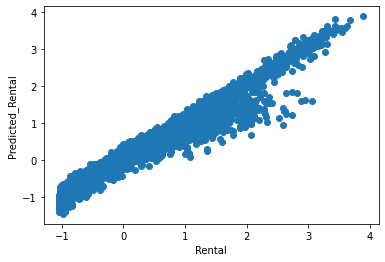

In [89]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.xlabel('Rental')
plt.ylabel('Predicted_Rental')

# Machine Learning without Standardization

In [90]:
ds=pd.read_excel('7B21E008.xls',sheet_name=1)
ds.head()

,year,month,day,hour,member,weekend,season,temperature,dewpoint,humidity,windspeed,windgust,pressure,precip,precipaccum,weather,rental
0,2016,10,1,0,80,1,fall,18.33,65.0,100.0,6.0,0.0,30.1,0.0,0.0,3,103
1,2016,10,1,1,53,1,fall,17.78,64.0,100.0,10.0,0.0,30.1,0.0,0.0,3,63
2,2016,10,1,2,27,1,fall,17.78,64.0,100.0,10.0,0.0,30.1,0.0,0.0,3,33
3,2016,10,1,3,20,1,fall,17.78,64.0,100.0,10.0,0.0,30.1,0.1,0.0,3,23
4,2016,10,1,4,11,1,fall,17.78,64.0,100.0,9.0,0.0,30.1,0.0,0.0,3,11


In [40]:
ds.drop(['precip','precipaccum','month','year','day','pressure'],axis=1,inplace=True)
ds.head()

,hour,member,weekend,season,temperature,dewpoint,humidity,windspeed,windgust,weather,rental
0,0,80,1,fall,18.33,65.0,100.0,6.0,0.0,3,103
1,1,53,1,fall,17.78,64.0,100.0,10.0,0.0,3,63
2,2,27,1,fall,17.78,64.0,100.0,10.0,0.0,3,33
3,3,20,1,fall,17.78,64.0,100.0,10.0,0.0,3,23
4,4,11,1,fall,17.78,64.0,100.0,9.0,0.0,3,11


In [41]:
ds['hour']=ds.hour.astype('category')
ds['weekend']=ds.weekend.astype('category')
ds['weather']=ds.weather.astype('category')
ds['season']=ds.season.astype('category')

In [42]:
dummies = pd.get_dummies(ds[['season','hour','weather',]])
dummies.head()

,season_fall,season_spring,season_summer,season_winter,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,weather_1,weather_2,weather_3,weather_4
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [43]:
dummies.drop(['season_winter','hour_23','weather_4'],axis=1,inplace=True)
ds.drop(['season','hour','weather'],axis=1,inplace=True)
df2=ds.drop(['weekend'],axis=1)
ds.drop(['member','temperature','dewpoint','humidity','windspeed','windgust','rental'],axis=1,inplace=True)

In [44]:
added=pd.concat([df2,ds,dummies],axis=1)
added.head()

,member,temperature,dewpoint,humidity,windspeed,windgust,rental,weekend,season_fall,season_spring,...,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,weather_1,weather_2,weather_3
0,80,18.33,65.0,100.0,6.0,0.0,103,1,1,0,...,0,0,0,0,0,0,0,0,0,1
1,53,17.78,64.0,100.0,10.0,0.0,63,1,1,0,...,0,0,0,0,0,0,0,0,0,1
2,27,17.78,64.0,100.0,10.0,0.0,33,1,1,0,...,0,0,0,0,0,0,0,0,0,1
3,20,17.78,64.0,100.0,10.0,0.0,23,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,11,17.78,64.0,100.0,9.0,0.0,11,1,1,0,...,0,0,0,0,0,0,0,0,0,1


In [45]:
y = added['rental']
X = added[['member', 'temperature', 'dewpoint', 'humidity', 'windspeed',
       'windgust','weekend', 'season_fall', 'season_spring',
       'season_summer', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4',
       'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11',
       'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17',
       'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'weather_1',
       'weather_2', 'weather_3']]

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.36,random_state=81)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [47]:
cdf=pd.DataFrame(lm.coef_,X.columns,columns=['Coeff']) 
cdf

,Coeff
member,1.166704
temperature,7.678249
dewpoint,-1.780061
humidity,-0.219702
windspeed,-0.758407
windgust,-0.328844
weekend,100.131151
season_fall,-4.799781
season_spring,27.305959
season_summer,1.323648


In [48]:
predictions = lm.predict(X_test)
predictions

array([ 902.50710816, 1333.49682374, 1147.39999244, ...,   34.29069741,
        484.11461576,   64.12935233])

In [49]:
lm.score(X_test,y_test) # As R^2 is closer to 1 it good sign that our model's prediction are accurate

0.9599595772948902

In [50]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 56.330647395982766
MSE: 6450.643047130396
RMSE: 80.3158953578331


Text(0, 0.5, 'Predicted_Rental')

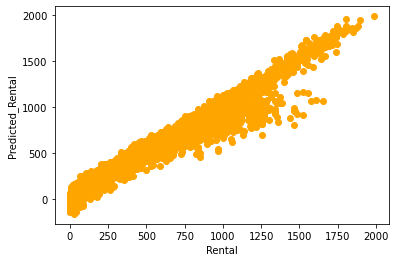

In [53]:
plt.scatter(y_test,predictions,color='orange')
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.xlabel('Rental')
plt.ylabel('Predicted_Rental')

Comparing R^2 score of both the models we can conclude that our model is trained properly and it is almost accurate